In [196]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score
import time

In [197]:
x,y = make_regression(n_samples = 40,n_features=3,n_targets=1,n_informative=1,noise=60)
datas = pd.DataFrame({
    'Column1':x[:,0],'Column2':x[:,1],'Column3':x[:,2],'Target':y
})
datas.sample(7)

,Column1,Column2,Column3,Target
21,0.368571,-2.250030,0.498043,104.995954
26,2.269897,-0.142669,-0.623480,100.340659
32,-0.229106,-0.656886,1.563552,27.580779
13,-0.415864,0.766504,0.068510,-31.899744
16,-0.614738,0.066742,0.482694,-103.590171
34,-0.847877,2.189270,-1.191294,-119.205450
36,-0.452898,1.142875,0.969274,20.199894


In [198]:
print(x.shape)
print(y.shape)

(40, 3)
(40,)


In [199]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.1)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(36, 3)
(4, 3)
(36,)
(4,)


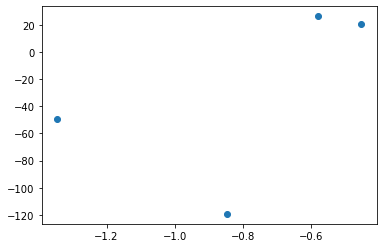

In [200]:
a = xtest[:,0:1]
b = ytest
plt.scatter(a,b)
plt.show()

Method One

In [201]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(xtrain,ytrain)
ypred = lr.predict(xtest)
from sklearn.metrics import r2_score
r2 = r2_score(ytest,ypred)
r2

0.15378813487784138

In [202]:
lr.coef_

array([68.95490906,  0.48553713, -3.7797614 ])

In [203]:
lr.intercept_

7.560528924730731

# Without Sklearn Modules

In [204]:
class GDRegressor:
    def __init__(self,learnrate,epochs):
        self.m = 100
        self.b = -120
        self.lr = learnrate
        self.epochs = epochs
        
    def fit(self,xtrain,ytrain):
        for i in range(self.epochs):
            loss_slope_b = -2*np.sum(ytrain-self.m*xtrain.ravel()-self.b)
            loss_slope_m = -2*np.sum((ytrain-self.m*xtrain.ravel()-self.b)*xtrain.ravel())
            self.b = self.b-(self.lr-loss_slope_b)
            self.m = self.m-(self.lr-loss_slope_m)
        print("value of m = ",self.m)
        print("value of b = \n",self.b)
    def predict(self,xtest):
        return self.m*xtest+self.b
        

In [205]:
gd = GDRegressor(0.01,10)

In [206]:
x = datas.iloc[:,0:3].values
y = datas.iloc[:,3:4].values

In [207]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.1)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(36, 3)
(4, 3)
(36, 1)
(4, 1)


In [208]:
xtest

array([[-0.16782734, -0.65657626,  1.4297348 ],
       [ 1.31810256,  0.98020416, -0.2755127 ],
       [-0.61473811,  0.0667425 ,  0.4826942 ],
       [-0.30155685,  0.15400396,  0.53093095]])

In [209]:
start = time.time()
gd.fit(xtrain,ytrain)
print("Time taken by algo = ",(time.time()-start))

value of m =  1.1292481186750403e+41
value of b = 
 -5.236173821697629e+40
Time taken by algo =  0.003756284713745117


In [210]:
ypred = gd.predict(xtest[:,0:1])
print(ypred)
print(ytest)
r2 = r2_score(ytest,ypred)
print("R2 score = ",r2)

[[-7.13136091e+40]
 [ 9.64847450e+40]
 [-1.21780924e+41]
 [-8.64149888e+40]]
[[ -70.29245877]
 [  45.13528471]
 [-103.59017149]
 [ -17.5916137 ]]
R2 score =  -2.8972400860322198e+78
